# Movie Recommendation System

### A) Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### B) Get Data

In [2]:
columns_names = ['user-id','item_id','rating','timestamp']
# 'timestamp' = Duration of time, upto which movies have been rated

In [3]:
df = pd.read_csv('u.data', sep='\t',names=columns_names)
# sep = seperate

In [4]:
df.head()

,user-id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


* 1. LET'S Grab the Movie titles

In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head() #We observe that, there is a correlation of titles with "item_id"

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


* 2. Merge "u.data" with "titles"

In [7]:
#Let's Replace item_id with the titles in "u.data"

df = pd.merge(df,movie_titles,on='item_id')

In [8]:
df.head()

,user-id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### C)EDA-Exploratory Data Analysis

In [12]:
sns.set_style('white')

* 1. Calculate Average Rating for each title/ Feature col.=title/ Target col. = Rating

In [14]:

df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

As we did "groupby", there could be a chance that 1-2 People saw the movie and gave 5 rating
* 2.lets' find out movie titles with most nos. rating

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

* 3. Create a DataFrame with 'titles', 'ratings'

In [16]:

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


* 4. Add 'Number of ratings' col. to the above DataFrame.

In [18]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


__
* Lets' Create Histograms, to Understand the Data

<AxesSubplot:>

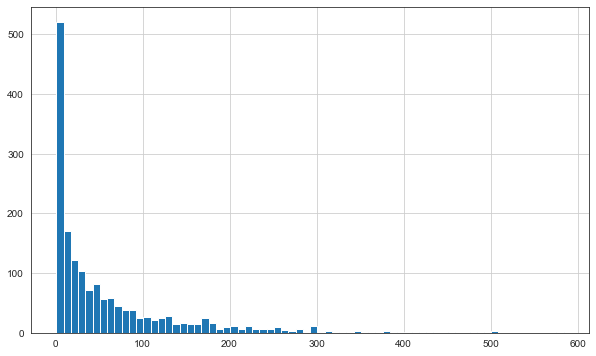

In [22]:
plt.figure(figsize=(10,6))
ratings['number of ratings'].hist(bins=70)

<AxesSubplot:>

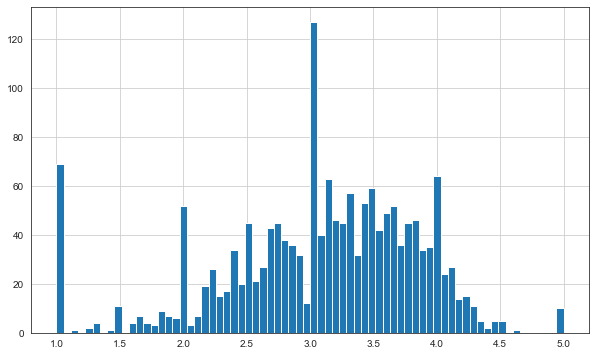

In [23]:
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=70)

* Relation b/w 'Avg. ratings' & 'nos. of ratings'

D:\Softwares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


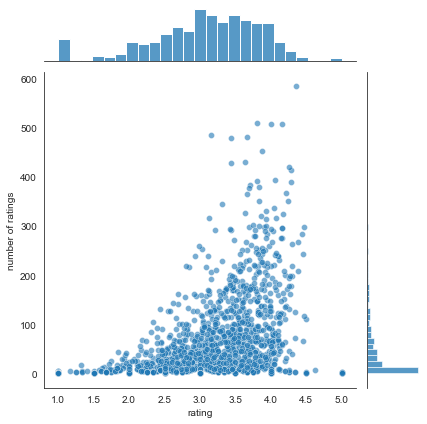

In [25]:
sns.jointplot('rating','number of ratings', data=ratings, alpha=0.6)

##### Observations:
* Some Outliers present | Movie rated by very few | Very High ratings-viceversa

As now we have a general idea of Data, We can create a Movie Recommendation System

### D) Movie Recommendation System - 
##### Recommending Similar Movies

We just require, 'User-ID' as index, 'title' as col., having 'rating' as values  | Thus as we require only few cols. out of a Data Set - > Use "Pivot"

In [26]:
moviemat = df.pivot_table(index='user-id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user-id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Most Rated Movies

In [28]:
ratings.sort_values('number of ratings', ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


* Lets' select 2 movies and grab their ratings

In [29]:
starwars_user_ratings = moviemat['Star Wars (1977)']
fargo_user_ratings  = moviemat['Fargo (1996)']
starwars_user_ratings.head()

user-id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

* We can use corrwith to get correlation b/w 2 pandas series

In [31]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
#Gives Correlation of Starwars movie with the "USER-BEHAVIOR" of other movies
# We can use this to fill in the Null Values

In [32]:
similar_to_fargo = moviemat.corrwith(fargo_user_ratings)
#Gives correlation of Fargo movie with the "USER-BEHAVIOR" of other movies

D:\Softwares\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Softwares\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

##### a) Movie Recommendation W.r.t. Starwars

In [35]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [36]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


* Some Movies that doesn't make sense w.r.t. Starwars, have perfect correlation
     * Happens coz. maybe only few peoples have watched that movie that rated Starwars and Other movie with same rating

In [38]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


##### We can fix this by, putting "Number of Ratings" as THRESHOLD for "Filteration" with the "corr_starwars" DF.

In [40]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])
#Used Join Method as 'title' is already a Index of that DF, so that makes a good fit
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [41]:
corr_starwars[corr_starwars['number of ratings'] > 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


##### Observation: (Starwars)
* Some top movies have correlation with Starwars w.r.t. its Content.
* Some movies have correlation with Starwars w.r.t its Fame level.

##### b) Movie Recommendation W.r.t. Fargo

In [42]:
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['Correlation'])
corr_fargo.dropna(inplace=True)

In [43]:
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [44]:
corr_fargo = corr_fargo.join(ratings['number of ratings'])
corr_fargo.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [45]:
corr_fargo[corr_fargo['number of ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,number of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121


##### Observation: (Fargo)
* Some top movies have correlation with Fargo w.r.t. its Content.
* Some movies have correlation with Fargo w.r.t its Fame level.

# Thank You!